### UPRM Hackathon 2025 - MultiLabel Image Classification using Convolutional Neural Networks

* <b> Author: </b> Jean Han, Hamzah Abdulrazzaq, Edgar Perez
* <b> Date: </b> September 5th, 2025
* <b> Objective: 
UPRM Hackathon 2025 will be focused on exploring the capabilities of Convolutional Neural Networks (CNNs) in tackling complex image classification tasks. Specifically, participants will delve into the realm of MultiLabel, MultiClass image classification using the 'Nasa Geographical Objects' dataset, which comprises a diverse range of geographical features. The dataset includes images of various landscapes, such as islands, mountains, deserts, rivers, lakes, forests, and cities, with some images featuring combinations of these features. The task at hand is to design and optimize CNN architectures to accurately predict the relevant geographical labels for a given image., The challenge lies in developing a robust model that can effectively handle the complexities of MultiLabel, MultiClass classification, requiring meticulous attention to data preprocessing, hyper-parameter tuning, and potentially incorporating techniques such as transfer learning, data augmentation, and ensemble methods. The winning submissions will be evaluated based on their performance, with a key metric being the model's ability to balance precision and recall across multiple labels.
   </b> 
* <b> Dataset License Acknowledgement: Image courtesy of the Earth Science and Remote Sensing Unit, NASA Johnson Space Center


## Table of Contents

- [Background Information: Neural Networks and Multi-Label Classification](#Background-Information:-Neural-Networks-and-Multi-Label-Classification)
- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Configurations + Basic Visualization](#Configurations-+-Basic-Visualization)
- [Dealing with Data Imbalance](#Data-Imbalance)
- [Custom Image Dataset](#Custom-Image-Dataset)
- [Image Augmentation](#Image-Augmentation)
- [Building CNN Architecture](#Building-CNN-Architecture)
- [Model Training](#Model-Training)
- [Visualize Loss and F1](#Visualize-Metrics)
- [Performance Analysis (Where is the model underperforming?)](#Where-is-the-model-underperforming)
- [Performance Analysis (Confusion Matrix)](#Confusion-Matrix)

<!-- ## Background Information: Neural Networks and Multi-Label Classification -->

#### Convolutional Neural Networks:
A convolutional neural network (CNN or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They have proven to be very effective in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, brain-computer interfaces, and financial time series modeling. CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a different approach towards regularization: they take advantage of the hierarchical pattern in data and assemble more complex patterns using smaller and simpler patterns. Therefore, on the scale of connectedness and complexity, CNNs are on the lower extreme.Convolutional networks were inspired by biological processes in that the connectivity pattern between neurons resembles the organization of the animal visual cortex. Individual cortical neurons respond to stimuli only in a restricted region of the visual field known as the receptive field. The receptive fields of different neurons partially overlap such that they cover the entire visual field.


#### MultiLabel Classification

In traditional image classification (single-label), each image belongs to exactly one class. However, in multi-label classification, each image can simultaneously belong to multiple classes. For example, an image might contain both a "dog" and a "person" - requiring the model to predict multiple correct labels. This fundamentally changes the classification problem from selecting a single class from mutually exclusive options to making independent binary decisions about the presence of each possible class.

#### Challenges of MultiLabel Classification

1. __Class Imbalance__: Some labels may appear much more frequently than others.
2. __Label Correlations__: Labels often exhibit strong correlations (e.g., "beach" and "ocean" frequently co-occur), which the model needs to learn.
3. __Evaluation Complexity__: Simple accuracy metrics become insufficient; metrics like F1-score, Hamming loss, mean average precision (mAP), or precision-recall curves are more appropriate.
4. __Data Augmentation__: It is critical to ensure diversity of images with Multi-Label tasks. Effective strategies include random crops, flips, rotations, etc. 

#### Helpful Resources:
- [What are Convolutional Neural Networks](https://www.bing.com/videos/search?q=convolutional+neural+network&docid=603549927117705930&mid=E7ED04059A9474B24BFEE7ED04059A9474B24BFE&view=detail&FORM=VIRE)
- [Overview of MultiLabel Classification](https://en.wikipedia.org/wiki/Multi-label_classification)
- [MultiLabel Classification Demo for Beginners](https://medium.com/data-science-in-your-pocket/multi-label-classification-for-beginners-with-codes-6b098cc76f99)
- [Interactive Demo for Image kernels](https://deeplizard.com/resource/pavq7noze2)
- [Introduction to Pooling Layers](https://www.geeksforgeeks.org/deep-learning/cnn-introduction-to-pooling-layer/)

# Download data

In [1]:
!pip install -r requirements.txt

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olebro/nasa-geographical-objects-multilabel-dataset")

# Importing Necessary Libraries

In [3]:
import torch   
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import re
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import ast
from collections import Counter
from tqdm import tqdm
from torchvision.transforms import transforms
from sklearn.utils import resample
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from torch.optim.lr_scheduler import ReduceLROnPlateau, CosineAnnealingLR
import torchvision.models as models
from collections import namedtuple

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [5]:
train_data_raw = pd.read_csv('data/train.csv')
val_data_raw = pd.read_csv('data/val.csv')

print(f'Training data shape: {train_data_raw.shape}')
print(f'Validation data shape: {val_data_raw.shape}')

Training data shape: (1248, 3)
Validation data shape: (765, 3)


# Configurations + Basic Visualization

In [6]:
class Config:
    img_dimensions = (224, 224)   
    channels = 3
    images_path = os.path.join(path, 'images')
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
    initial_learning_rate = 0.001 
    batch_size = 
    num_epochs = 50  
    weight_decay = 1e-4
    
    threshold = 0.4  

    patience = 7
    min_delta = 0.001
    
    print(f"Using device: {device}")
    print(f"Image dimensions: {img_dimensions}")
    print(f"Batch size: {batch_size}")

Using device: cuda
Image dimensions: (224, 224)
Batch size: 386


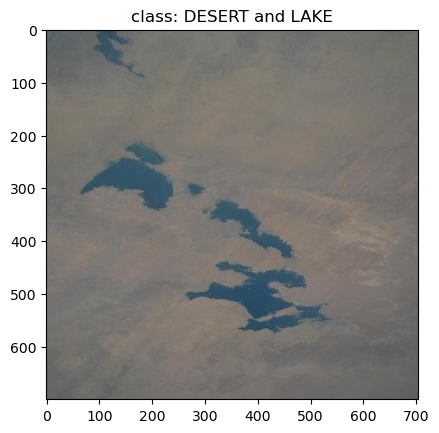

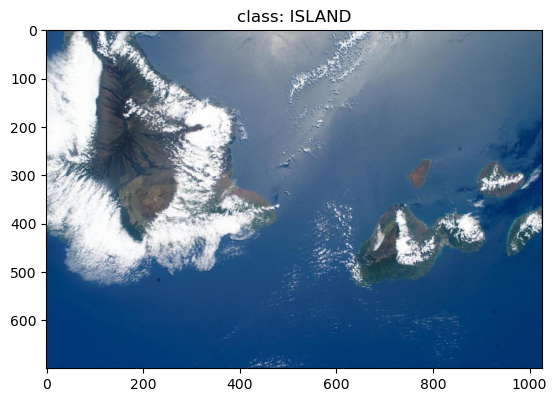

In [7]:
def img_display(path, label):
    img = cv2.imread(path)[:,:,::-1]
    plt.imshow(img)
    plt.grid(False)
    plt.title(f'class: {label}')
    plt.show()

train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
train_labels = [lbl for lbl in train_data_raw['Label Vector']]
train_string_labels = [lbl for lbl in train_data_raw['Label String']]

val_imgs = [os.path.join(Config.images_path, img) for img in val_data_raw['FileName']]
val_labels = [lbl for lbl in val_data_raw['Label Vector']]
val_string_labels = [lbl for lbl in val_data_raw['Label String']]

img_display(train_imgs[0], train_string_labels[0])
img_display(val_imgs[0], val_string_labels[0])

## Data Imbalance
Data imbalance in multilabel classification presents a distinct challenge that differs from binary or multiclass settings. This imbalance occurs in two distinct forms: label-level imbalance and label-combination imbalance. Label-level imbalance arises when certain individual labels appear significantly less frequently than others. In contrast, label-combination imbalance occurs when specific combinations of labels co-occur rarely, making it difficult for models to learn effective representations for these infrequent label combinations.

We recommend reading through [Handling Data Imbalance for MultiLabel Classification](https://medium.com/thecyphy/handling-data-imbalance-in-multi-label-classification-mlsmote-531155416b87). This is a great way to get started. Another great way to handle data imbalance is by using [Focal Loss](https://docs.pytorch.org/vision/main/generated/torchvision.ops.sigmoid_focal_loss.html). 

There are many different strategies that can be implemented to solve this issue. We recommend experimenting with different options and seeing which ones provide the most promising results. 

In [8]:
def analyze_label_distribution(data, label_col='Label Vector', string_col='Label String'):
    """
    Comprehensive analysis of label distribution in multi-label dataset
    """

    label_vectors = []
    for label_str in data[label_col]:
        try:

            if isinstance(label_str, str):
                label_vec = ast.literal_eval(label_str)
            else:

                label_vec = label_str
            label_vectors.append(label_vec)
        except (ValueError, SyntaxError) as e:
            print(f"Error parsing label: {label_str}, type: {type(label_str)}")

            if isinstance(label_str, str):
                if label_str.startswith('[') and label_str.endswith(']'):

                    try:
                        cleaned = label_str.strip('[]').split(',')
                        label_vec = [int(x.strip()) for x in cleaned]
                        label_vectors.append(label_vec)
                    except:

                        print(f"Could not parse label: {label_str}, using zeros")
                        label_vectors.append([0] * 10)  # Assuming 10 classes
                else:

                    print(f"Non-standard label format: {label_str}, using zeros")
                    label_vectors.append([0] * 10)  # Assuming 10 classes
            else:
                # Already in non-string format (like a list or numpy array)
                try:
                    label_vectors.append(list(label_str))
                except:
                    print(f"Unhandled label type: {type(label_str)}")
                    label_vectors.append([0] * 10)  # Default
    
    label_vectors = np.array(label_vectors)
    
    # Get unique label combinations and their counts
    unique_combinations = {}
    for i, row in data.iterrows():
        label_combo = row[string_col]
        if label_combo in unique_combinations:
            unique_combinations[label_combo] += 1
        else:
            unique_combinations[label_combo] = 1
    
    individual_labels = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    label_counts = np.sum(label_vectors, axis=0)
    
    print("=== INDIVIDUAL LABEL DISTRIBUTION ===")
    for i, (label, count) in enumerate(zip(individual_labels, label_counts)):
        percentage = (count / len(data)) * 100
        print(f"{label}: {count} samples ({percentage:.2f}%)")
    
    print("\n=== LABEL COMBINATION DISTRIBUTION ===")
    sorted_combinations = sorted(unique_combinations.items(), key=lambda x: x[1], reverse=True)
    for combo, count in sorted_combinations[:15]:  # Top 15 combinations
        percentage = (count / len(data)) * 100
        print(f"{combo}: {count} samples ({percentage:.2f}%)")
    
    print(f"\nTotal unique label combinations: {len(unique_combinations)}")
    
    return label_vectors, unique_combinations, label_counts, individual_labels



def visualize_class_imbalance(label_counts, individual_labels, unique_combinations):

    # Create a custom layout with 2 rows and 2 columns
    fig = plt.figure(figsize=(20, 15))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1.2])  # Make bottom row slightly taller

    # First graph: Individual label distribution
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.bar(individual_labels, label_counts, color='skyblue', edgecolor='navy')
    ax1.set_title('Individual Label Distribution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Labels')
    ax1.set_ylabel('Frequency')
    ax1.tick_params(axis='x', rotation=45)

    # Second graph: Imbalance ratio
    max_count = max(label_counts)
    imbalance_ratios = max_count / label_counts
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.bar(individual_labels, imbalance_ratios, color='orange', edgecolor='darkorange')
    ax2.set_title('Class Imbalance Ratio (Max/Current)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Labels')
    ax2.set_ylabel('Imbalance Ratio')
    ax2.tick_params(axis='x', rotation=45)

    # Bottom full-width heatmap: Co-occurrence matrix
    ax3 = fig.add_subplot(gs[1, :])  # Span both columns
    cooccurrence_matrix = np.zeros((len(individual_labels), len(individual_labels)))

    for combo_str, count in unique_combinations.items():
        labels_present = [i for i, label in enumerate(individual_labels) if label in combo_str]
        for i in labels_present:
            for j in labels_present:
                cooccurrence_matrix[i, j] += count

    sns.heatmap(cooccurrence_matrix,
                xticklabels=individual_labels,
                yticklabels=individual_labels,
                annot=True, fmt='.0f', cmap='Blues', ax=ax3)
    ax3.set_title('Label Co-occurrence Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return cooccurrence_matrix

    
def calculate_imbalance_metrics(label_counts):
    """
    Calculate various imbalance metrics
    """
    total_samples = np.sum(label_counts)
    
    max_class = np.max(label_counts)
    min_class = np.min(label_counts)
    imbalance_ratio = max_class / min_class
    
    mean_per_label = np.mean(label_counts)
    
    cv = np.std(label_counts) / np.mean(label_counts)
    
    print("\n=== IMBALANCE METRICS ===")
    print(f"Imbalance Ratio (Max/Min): {imbalance_ratio:.2f}")
    print(f"Mean Per Label: {mean_per_label:.2f}")
    print(f"Coefficient of Variation: {cv:.3f}")
    print(f"Most frequent class: {max_class} samples")
    print(f"Least frequent class: {min_class} samples")
    
    return {
        'imbalance_ratio': imbalance_ratio,
        'mean_per_label': mean_per_label,
        'coefficient_variation': cv,
        'max_class_count': max_class,
        'min_class_count': min_class
    }

### Visualizing the Imbalance


TRAINING DATA ANALYSIS
=== INDIVIDUAL LABEL DISTRIBUTION ===
BEACH: 85 samples (6.81%)
CITY: 64 samples (5.13%)
COAST: 140 samples (11.22%)
DESERT: 436 samples (34.94%)
FOREST: 4 samples (0.32%)
ISLAND: 333 samples (26.68%)
LAKE: 152 samples (12.18%)
MOUNTAIN: 212 samples (16.99%)
RIVER: 193 samples (15.46%)
SNOW: 246 samples (19.71%)

=== LABEL COMBINATION DISTRIBUTION ===
ISLAND: 261 samples (20.91%)
MOUNTAIN and SNOW: 182 samples (14.58%)
DESERT: 173 samples (13.86%)
DESERT and LAKE: 107 samples (8.57%)
RIVER: 99 samples (7.93%)
COAST and ISLAND: 72 samples (5.77%)
COAST and DESERT: 68 samples (5.45%)
AGRICULTURE and DESERT: 54 samples (4.33%)
CITY and RIVER: 54 samples (4.33%)
LAKE and SNOW: 40 samples (3.21%)
DESERT and RIVER: 34 samples (2.72%)
AGRICULTURE: 31 samples (2.48%)
SNOW: 24 samples (1.92%)
MOUNTAIN: 24 samples (1.92%)
CITY: 10 samples (0.80%)

Total unique label combinations: 18

=== IMBALANCE METRICS ===
Imbalance Ratio (Max/Min): 109.00
Mean Per Label: 186.50
Coeffic

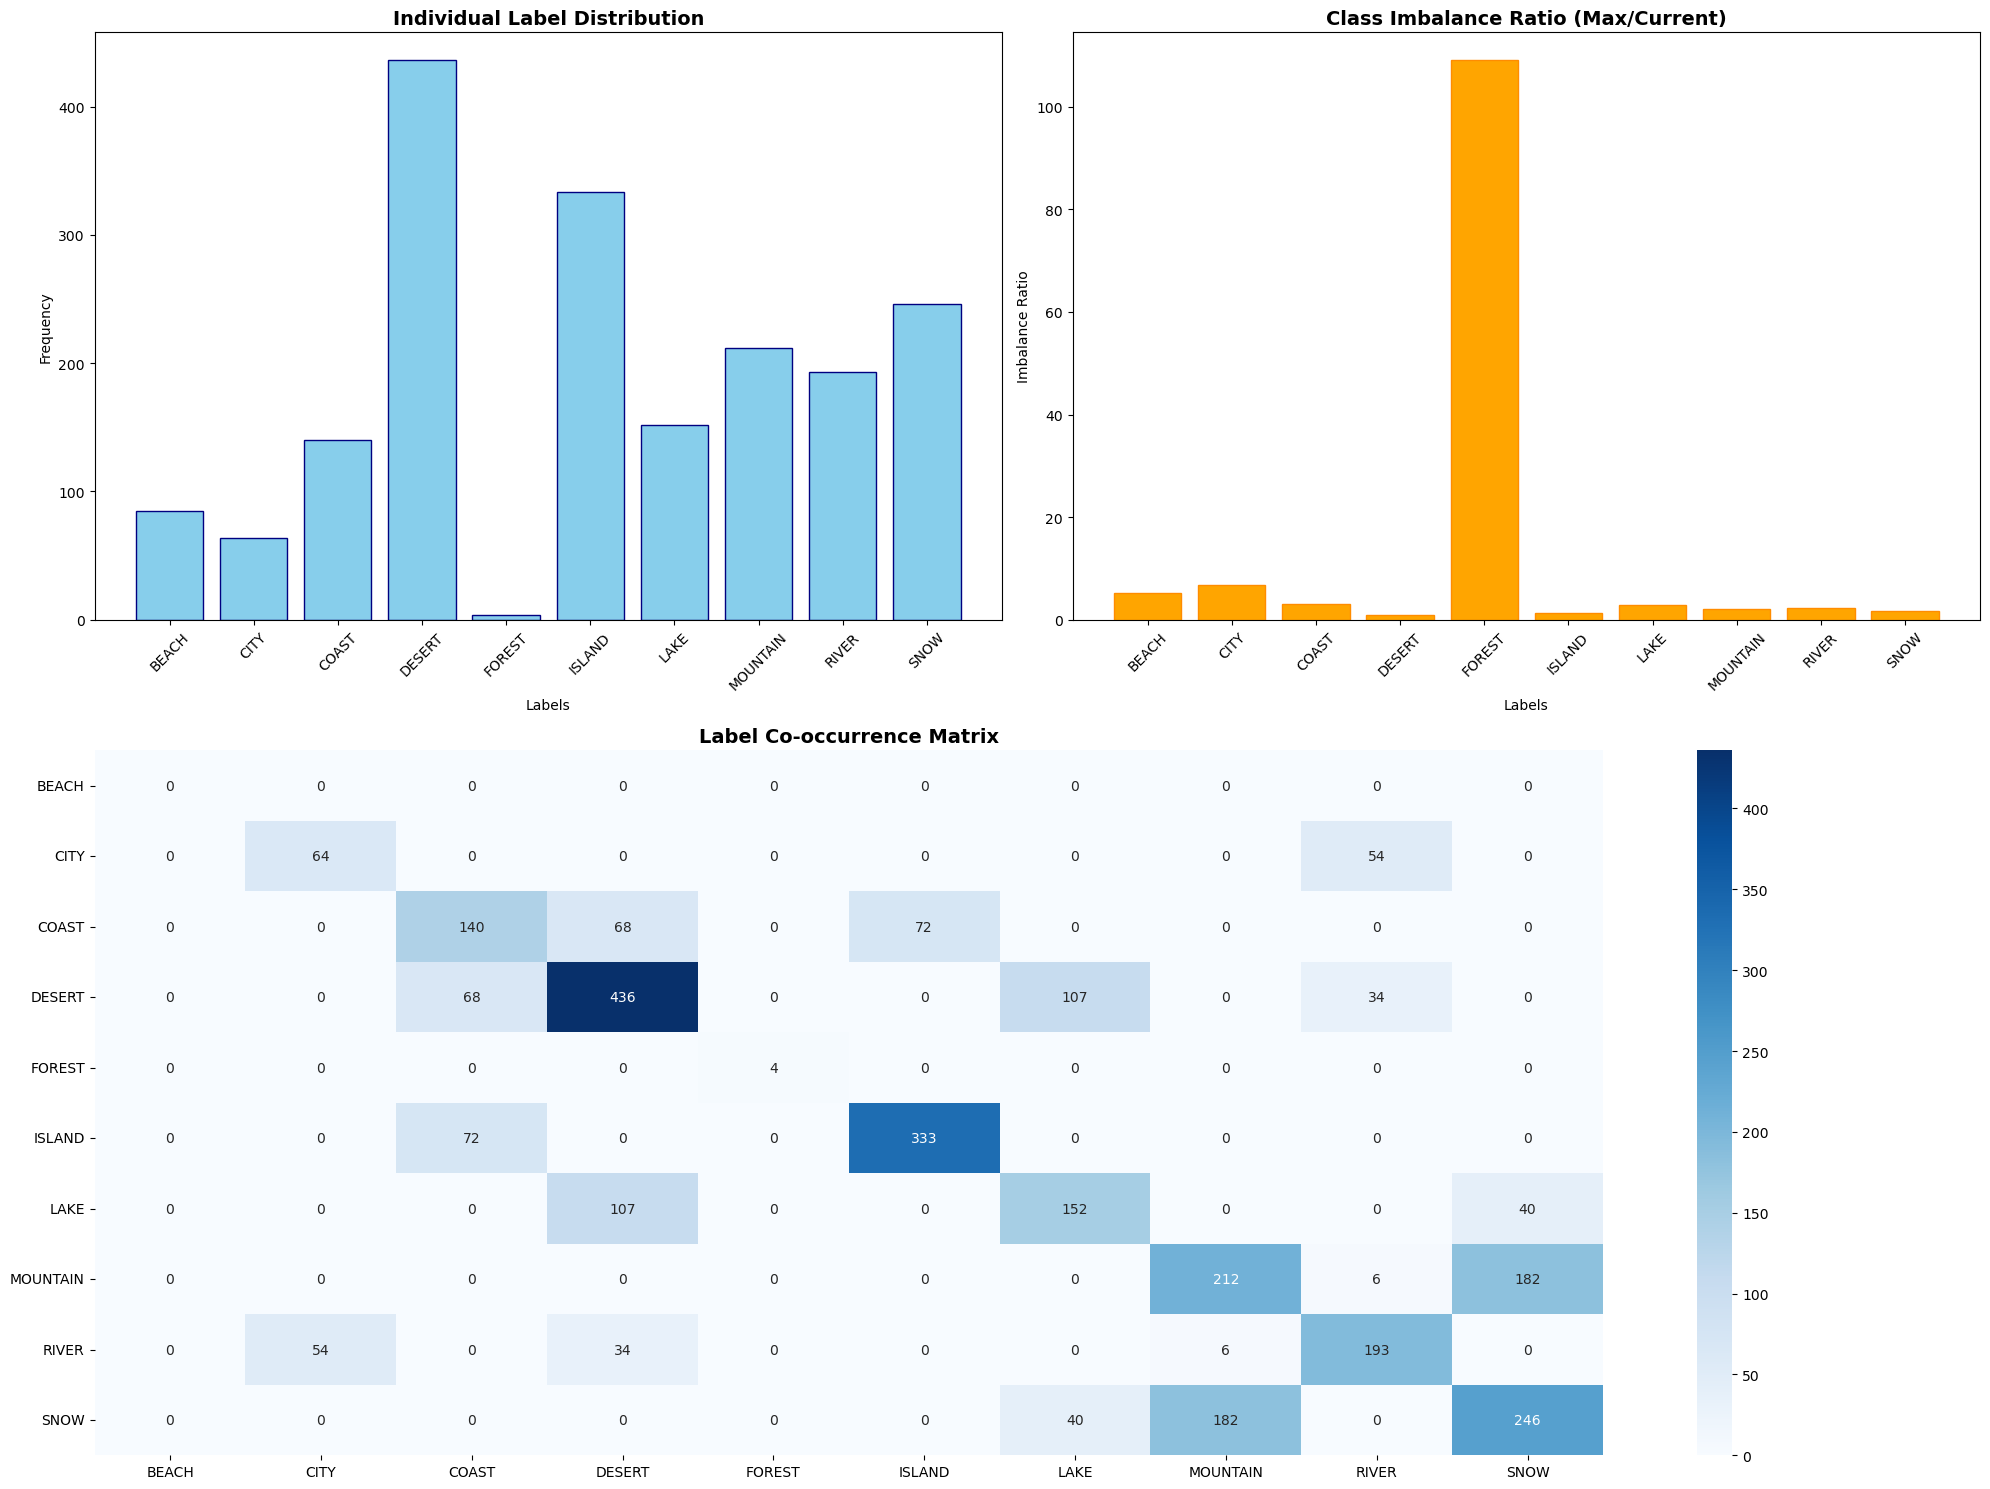

In [9]:
# Analyze class imbalance in training data
print("TRAINING DATA ANALYSIS")
print("=" * 50)
train_label_vectors, train_combinations, train_label_counts, individual_labels = analyze_label_distribution(train_data_raw)
train_metrics = calculate_imbalance_metrics(train_label_counts)

print("\n\nVALIDATION DATA ANALYSIS")
print("=" * 50)
val_label_vectors, val_combinations, val_label_counts, _ = analyze_label_distribution(val_data_raw)
val_metrics = calculate_imbalance_metrics(val_label_counts)

# Visualize the imbalance
print("\n\nVISUALIZING TRAINING DATA IMBALANCE...")
cooccurrence_matrix = visualize_class_imbalance(train_label_counts, individual_labels, train_combinations)

### Calculating the Positive Weights


In [10]:
def calculate_pos_weights(label_counts, strategy='inverse_freq'):
    total_samples = len(train_data_raw)
    
    if strategy == 'inverse_freq':
        pos_weights = total_samples / (2 * label_counts)
    elif strategy == 'effective_num':
        beta = 0.9999
        effective_num = 1.0 - np.power(beta, label_counts)
        pos_weights = (1.0 - beta) / effective_num
    else:
        neg_counts = total_samples - label_counts
        pos_weights = neg_counts / label_counts
    
    return torch.FloatTensor(pos_weights)

# Calculate positive weights for the loss function
pos_weights = calculate_pos_weights(train_label_counts, strategy='inverse_freq')
print("\nCalculated positive weights for each class:")
for i, (label, weight) in enumerate(zip(individual_labels, pos_weights)):
    print(f"{label}: {weight:.3f}")


Calculated positive weights for each class:
BEACH: 7.341
CITY: 9.750
COAST: 4.457
DESERT: 1.431
FOREST: 156.000
ISLAND: 1.874
LAKE: 4.105
MOUNTAIN: 2.943
RIVER: 3.233
SNOW: 2.537


### Helper Functions

In [11]:
def resize_normalize(img):
    """
    Argument: image
    steps: 1. Resize image to specified dimensions
           2. transpose so that channels are first
           3. resize image
    """
    img = cv2.resize(img, Config.img_dimensions)
    
    #ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    img = np.transpose(img, (2,0,1)) # reorder it to channels first
    img = torch.from_numpy(img).float()
    img = img / 255
    
    return img
    
def to_numpy(x):
    return x.detach().cpu().numpy()

In [12]:
# Threshold Optimization for Multi-Label Classification
def find_optimal_threshold(model, valid_dataloader, thresholds=np.arange(0.1, 0.9, 0.05)):

    model.eval()
    best_threshold = 0.5
    best_f1 = 0.0
    
    threshold_results = []
    
    with torch.no_grad():

        all_preds = []
        all_labels = []
        
        for x, y in tqdm(valid_dataloader, desc="Collecting predictions"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            all_preds.append(to_numpy(pred_sigmoid))
            all_labels.append(to_numpy(y))
        
        all_preds = np.vstack(all_preds)
        all_labels = np.vstack(all_labels)
        
        for threshold in thresholds:
            pred_binary = (all_preds > threshold).astype(int)
            f1 = f1_score(all_labels, pred_binary, average='micro', zero_division=0)
            threshold_results.append((threshold, f1))
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
                
            print(f"Threshold: {threshold:.2f}, F1: {f1:.4f}")
    
    print(f"\nOptimal threshold: {best_threshold:.2f} with F1: {best_f1:.4f}")
    
    # Plot threshold vs F1 score
    thresholds_list, f1_scores = zip(*threshold_results)
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds_list, f1_scores, 'b-o')
    plt.axvline(x=best_threshold, color='r', linestyle='--', label=f'Best: {best_threshold:.2f}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.title('Threshold Optimization for Multi-Label Classification')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return best_threshold, best_f1

In [13]:
class FocalLoss(nn.Module):
    """
    Focal Loss for addressing class imbalance in multi-label classification
    """
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        
    def forward(self, inputs, targets):
        bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * bce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class WeightedBCEWithLogitsLoss(nn.Module):
    """
    Weighted Binary Cross Entropy Loss to handle class imbalance
    """
    def __init__(self, pos_weights=None):
        super(WeightedBCEWithLogitsLoss, self).__init__()
        self.pos_weights = pos_weights
        
    def forward(self, inputs, targets):
        if self.pos_weights is not None:
            loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.pos_weights
            )
        else:
            loss = F.binary_cross_entropy_with_logits(inputs, targets)
        return loss


# Create weighted loss function
focal_criterion = FocalLoss(alpha=1, gamma=2)
weighted_criterion = WeightedBCEWithLogitsLoss(pos_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights)

In [14]:
def analyze_label_combinations(df, label_col='Label Vector', string_col='Label String', min_threshold=10):

    print("Analyzing label combinations...")
    
    combo_counts = df[string_col].value_counts()
    
    rare_combinations = combo_counts[combo_counts <= min_threshold].index.tolist()
    
    # Map combinations to their corresponding indices
    rare_combo_indices = {}
    for combo in rare_combinations:
        indices = df[df[string_col] == combo].index.tolist()
        rare_combo_indices[combo] = indices
    
    total_combinations = len(combo_counts)
    
    cardinality = []
    for combo in combo_counts.index:
        num_labels = len(combo.split(' and ')) if ' and ' in combo else 1
        cardinality.append(num_labels)
    
    cardinality_counts = pd.Series(cardinality).value_counts().sort_index()
    
    
    label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
    cooccurrence = np.zeros((len(label_names), len(label_names)))
    
    for _, row in df.iterrows():
        combo = row[string_col]
        labels_present = [label for label in label_names if label in combo]
        
        for i, label1 in enumerate(labels_present):
            for j, label2 in enumerate(labels_present):
                if i != j:  # Don't count self-cooccurrence
                    idx1 = label_names.index(label1)
                    idx2 = label_names.index(label2)
                    cooccurrence[idx1, idx2] += 1
    
    combo_stats = {
        'total_combinations': total_combinations,
        'rare_combinations': rare_combinations,
        'rare_combo_indices': rare_combo_indices,
        'cardinality_counts': cardinality_counts,
        'combo_counts': combo_counts,
        'cooccurrence_matrix': cooccurrence
    }
    
    return rare_combinations, combo_stats


### Implementing MLSMOTE for Multi-Label Data Imbalance

In [15]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import cv2

class CombinationMLSMOTE:

    def __init__(self, img_dir, n_neighbors=5, rare_combinations=None, rare_combo_indices=None, combo_counts=None, max_oversampling_factor=15):

        self.img_dir = img_dir
        self.n_neighbors = n_neighbors
        self.rare_combinations = rare_combinations
        self.rare_combo_indices = rare_combo_indices
        self.combo_counts = combo_counts
        self.max_oversampling_factor = max_oversampling_factor
        
    def _extract_features(self, df, indices):
        """
        Extract image features for the given indices
        """
        features = []
        for idx in indices:
            img_path = os.path.join(self.img_dir, df.iloc[idx]['FileName'])
            img = cv2.imread(img_path)
            
            if img is None:
                print(f"Warning: Could not load image: {img_path}, skipping")
                continue
                
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img = cv2.resize(img, Config.img_dimensions)
            img_flat = img.flatten() / 255.0  # Normalize
            
            features.append(img_flat)
        
        return np.array(features)
    
    def _find_nearest_neighbors(self, features, n_neighbors):

        if len(features) <= n_neighbors:
            print(f"Warning: Not enough samples ({len(features)}) to find {n_neighbors} neighbors")
            return None
        
        nn = NearestNeighbors(n_neighbors=min(n_neighbors+1, len(features)))
        nn.fit(features)
        distances, indices = nn.kneighbors(features)
        
        return distances, indices
    
    def _calculate_combination_sparsity(self):

        if not self.combo_counts:
            print("Warning: No combination counts available. Using default oversampling factors.")
            return {combo: 5 for combo in self.rare_combinations}
        
        max_count = max(self.combo_counts.values())
        min_count = min(count for combo, count in self.combo_counts.items() if combo in self.rare_combinations)
        
        sparsity_factors = {}
        for combo in self.rare_combinations:
            count = self.combo_counts.get(combo, 0)
            if count == 0:
                sparsity_factors[combo] = self.max_oversampling_factor
            else:

                rarity = max_count / max(count, 1)
                factor = 1 + (self.max_oversampling_factor - 1) * np.log(1 + rarity) / np.log(1 + max_count/min_count)
                sparsity_factors[combo] = int(np.ceil(factor))
        
        return sparsity_factors
    
    def _generate_synthetic_samples_for_combo(self, df, combo, oversampling_factor=5):

        if combo not in self.rare_combo_indices:
            print(f"Warning: Combination '{combo}' not found in rare_combo_indices")
            return pd.DataFrame()
        
        indices = self.rare_combo_indices[combo]
        
        if len(indices) < 2:
            print(f"Warning: Not enough samples for combination '{combo}' (found {len(indices)})")
            return pd.DataFrame()
        
        features = self._extract_features(df, indices)
        
        if len(features) < 2:
            print(f"Warning: Failed to extract features for combination '{combo}'")
            return pd.DataFrame()
        
        nn_result = self._find_nearest_neighbors(features, min(self.n_neighbors, len(features)-1))
        
        if nn_result is None:
            return pd.DataFrame()
            
        distances, nn_indices = nn_result
        
        sample_idx = indices[0]
        label_vector = df.iloc[sample_idx]['Label Vector']
        
        synthetic_samples = []
        
        for i, idx in enumerate(indices):
            for _ in range(oversampling_factor):
                if len(nn_indices[i]) <= 1:
                    continue
                    
                neighbor_idx = nn_indices[i][np.random.randint(1, len(nn_indices[i]))]
                
                alpha = np.random.random()
                x_syn = features[i] + alpha * (features[neighbor_idx] - features[i])
                
                img_syn = x_syn.reshape(Config.img_dimensions[0], Config.img_dimensions[1], 3)
                img_syn = (img_syn * 255).astype(np.uint8)
                
                orig_filename = df.iloc[indices[i]]['FileName']
                base_name = os.path.splitext(os.path.basename(orig_filename))[0]
                syn_filename = f"synthetic/combo_{base_name}_{i}_{_}.jpg"
                
                synthetic_dir = os.path.join(self.img_dir, 'synthetic')
                os.makedirs(synthetic_dir, exist_ok=True)
                cv2.imwrite(os.path.join(synthetic_dir, os.path.basename(syn_filename)), 
                            cv2.cvtColor(img_syn, cv2.COLOR_RGB2BGR))
                
                synthetic_samples.append({
                    'FileName': syn_filename,
                    'Label Vector': label_vector,
                    'Label String': combo
                })
        
        if not synthetic_samples:
            print(f"Warning: No synthetic samples generated for combination '{combo}'")
            return pd.DataFrame()
            
        print(f"Generated {len(synthetic_samples)} synthetic samples for combination '{combo}'")
        
        synthetic_df = pd.DataFrame(synthetic_samples)
        
        return synthetic_df
    
    def fit_resample(self, df, min_samples_per_combo=10):

        print("Starting adaptive CombinationMLSMOTE process...")
        
        if not self.rare_combinations or not self.rare_combo_indices:
            print("No rare combinations provided. Cannot proceed with CombinationMLSMOTE.")
            return df
        
        print(f"Processing {len(self.rare_combinations)} rare label combinations")
        
        if self.combo_counts is None:
            self.combo_counts = {combo: len(indices) for combo, indices in self.rare_combo_indices.items()}
        
        sparsity_factors = self._calculate_combination_sparsity()
        
        print("\nAdaptive oversampling factors based on combination rarity:")
        for combo, factor in sorted(sparsity_factors.items(), key=lambda x: x[1], reverse=True)[:10]:
            count = self.combo_counts.get(combo, 0)
            print(f"{combo}: {count} samples → factor {factor}x")
        
        all_synthetic_samples = []
        
        for combo in tqdm(self.rare_combinations, desc="Generating synthetic samples for rare combinations"):
            current_count = len(self.rare_combo_indices[combo])
            
            sparsity_factor = sparsity_factors.get(combo, 5)
            samples_needed = max(0, min_samples_per_combo - current_count)
            
            if samples_needed > 0:
                samples_per_original = max(
                    sparsity_factor,
                    max(1, samples_needed // current_count)
                )
                
                synthetic_df = self._generate_synthetic_samples_for_combo(
                    df, combo, oversampling_factor=samples_per_original
                )
                
                if not synthetic_df.empty:
                    all_synthetic_samples.append(synthetic_df)
        
        if not all_synthetic_samples:
            print("No synthetic samples generated. Returning original dataset.")
            return df
        
        synthetic_df = pd.concat(all_synthetic_samples, ignore_index=True)
        
        print(f"Generated a total of {len(synthetic_df)} synthetic samples for rare combinations")
        
        new_df = pd.concat([df, synthetic_df], ignore_index=True)
        
        print("\nCombination distribution improvement:")
        original_combo_counts = {}
        for combo in self.rare_combinations:
            original_combo_counts[combo] = len(self.rare_combo_indices[combo])
        
        new_combo_counts = {}
        for combo in self.rare_combinations:
            new_combo_counts[combo] = len(new_df[new_df['Label String'] == combo])
        
        for combo in sorted(self.rare_combinations, key=lambda x: original_combo_counts.get(x, 0)):
            before = original_combo_counts.get(combo, 0)
            after = new_combo_counts.get(combo, 0)
            increase = after - before
            increase_pct = (increase / before) * 100 if before > 0 else 0
            print(f"{combo}: {before} → {after} (+{increase}, {increase_pct:.1f}%)")
        
        print(f"\nFinal dataset size: {len(new_df)} samples")
        return new_df

In [16]:
# Apply CombinationMLSMOTE to handle label combination imbalance
print("Applying CombinationMLSMOTE to balance rare label combinations...")

if 'train_data_raw' not in locals() or train_data_raw is None:
    print("Loading training data first...")
    train_data_raw = pd.read_csv('data/train.csv')
    print(f'Training data loaded with shape: {train_data_raw.shape}')

rare_combinations, combo_stats = analyze_label_combinations(train_data_raw, min_threshold=5)

combo_mlsmote = CombinationMLSMOTE(
    img_dir=Config.images_path,
    n_neighbors=3,  # Fewer neighbors for rare combinations
    rare_combinations=rare_combinations,
    rare_combo_indices=combo_stats['rare_combo_indices']
)

try:
    combo_balanced_train_data = combo_mlsmote.fit_resample(
        train_data_raw, 
        min_samples_per_combo=10  # Ensure at least 10 samples per combination
    )

    print("\nLabel combination distribution before CombinationMLSMOTE:")
    before_rare_combinations, before_combo_stats = analyze_label_combinations(train_data_raw, min_threshold=5)

    print("\nLabel combination distribution after CombinationMLSMOTE:")
    after_rare_combinations, after_combo_stats = analyze_label_combinations(combo_balanced_train_data, min_threshold=5)

    print("\nCombination counts before and after balancing:")
    for combo in rare_combinations:
        before_count = len(combo_stats['rare_combo_indices'].get(combo, []))
        after_count = len(after_combo_stats['rare_combo_indices'].get(combo, []))
        print(f"{combo}: {before_count} → {after_count} samples (+{after_count - before_count})")

    train_data_raw = combo_balanced_train_data

    train_imgs = [os.path.join(Config.images_path, img) for img in train_data_raw['FileName']]
    train_labels = [lbl for lbl in train_data_raw['Label Vector']]
    train_string_labels = [lbl for lbl in train_data_raw['Label String']]

    print(f"\nFinal training data size after combination balancing: {len(train_data_raw)} samples")
    
except Exception as e:
    import traceback
    print(f"Error during CombinationMLSMOTE processing: {str(e)}")
    traceback.print_exc()
    print("\nContinuing with previously balanced dataset...")

Applying CombinationMLSMOTE to balance rare label combinations...
Analyzing label combinations...
Starting adaptive CombinationMLSMOTE process...
Processing 2 rare label combinations

Adaptive oversampling factors based on combination rarity:
FOREST: 4 samples → factor 15x
LAKE: 5 samples → factor 13x


Generating synthetic samples for rare combinations: 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]

Generated 65 synthetic samples for combination 'LAKE'
Generated 60 synthetic samples for combination 'FOREST'
Generated a total of 125 synthetic samples for rare combinations

Combination distribution improvement:
FOREST: 4 → 64 (+60, 1500.0%)
LAKE: 5 → 70 (+65, 1300.0%)

Final dataset size: 1373 samples

Label combination distribution before CombinationMLSMOTE:
Analyzing label combinations...



Label combination distribution after CombinationMLSMOTE:
Analyzing label combinations...

Combination counts before and after balancing:
LAKE: 5 → 0 samples (+-5)
FOREST: 4 → 0 samples (+-4)

Final training data size after combination balancing: 1373 samples



Visualizing synthetic samples.


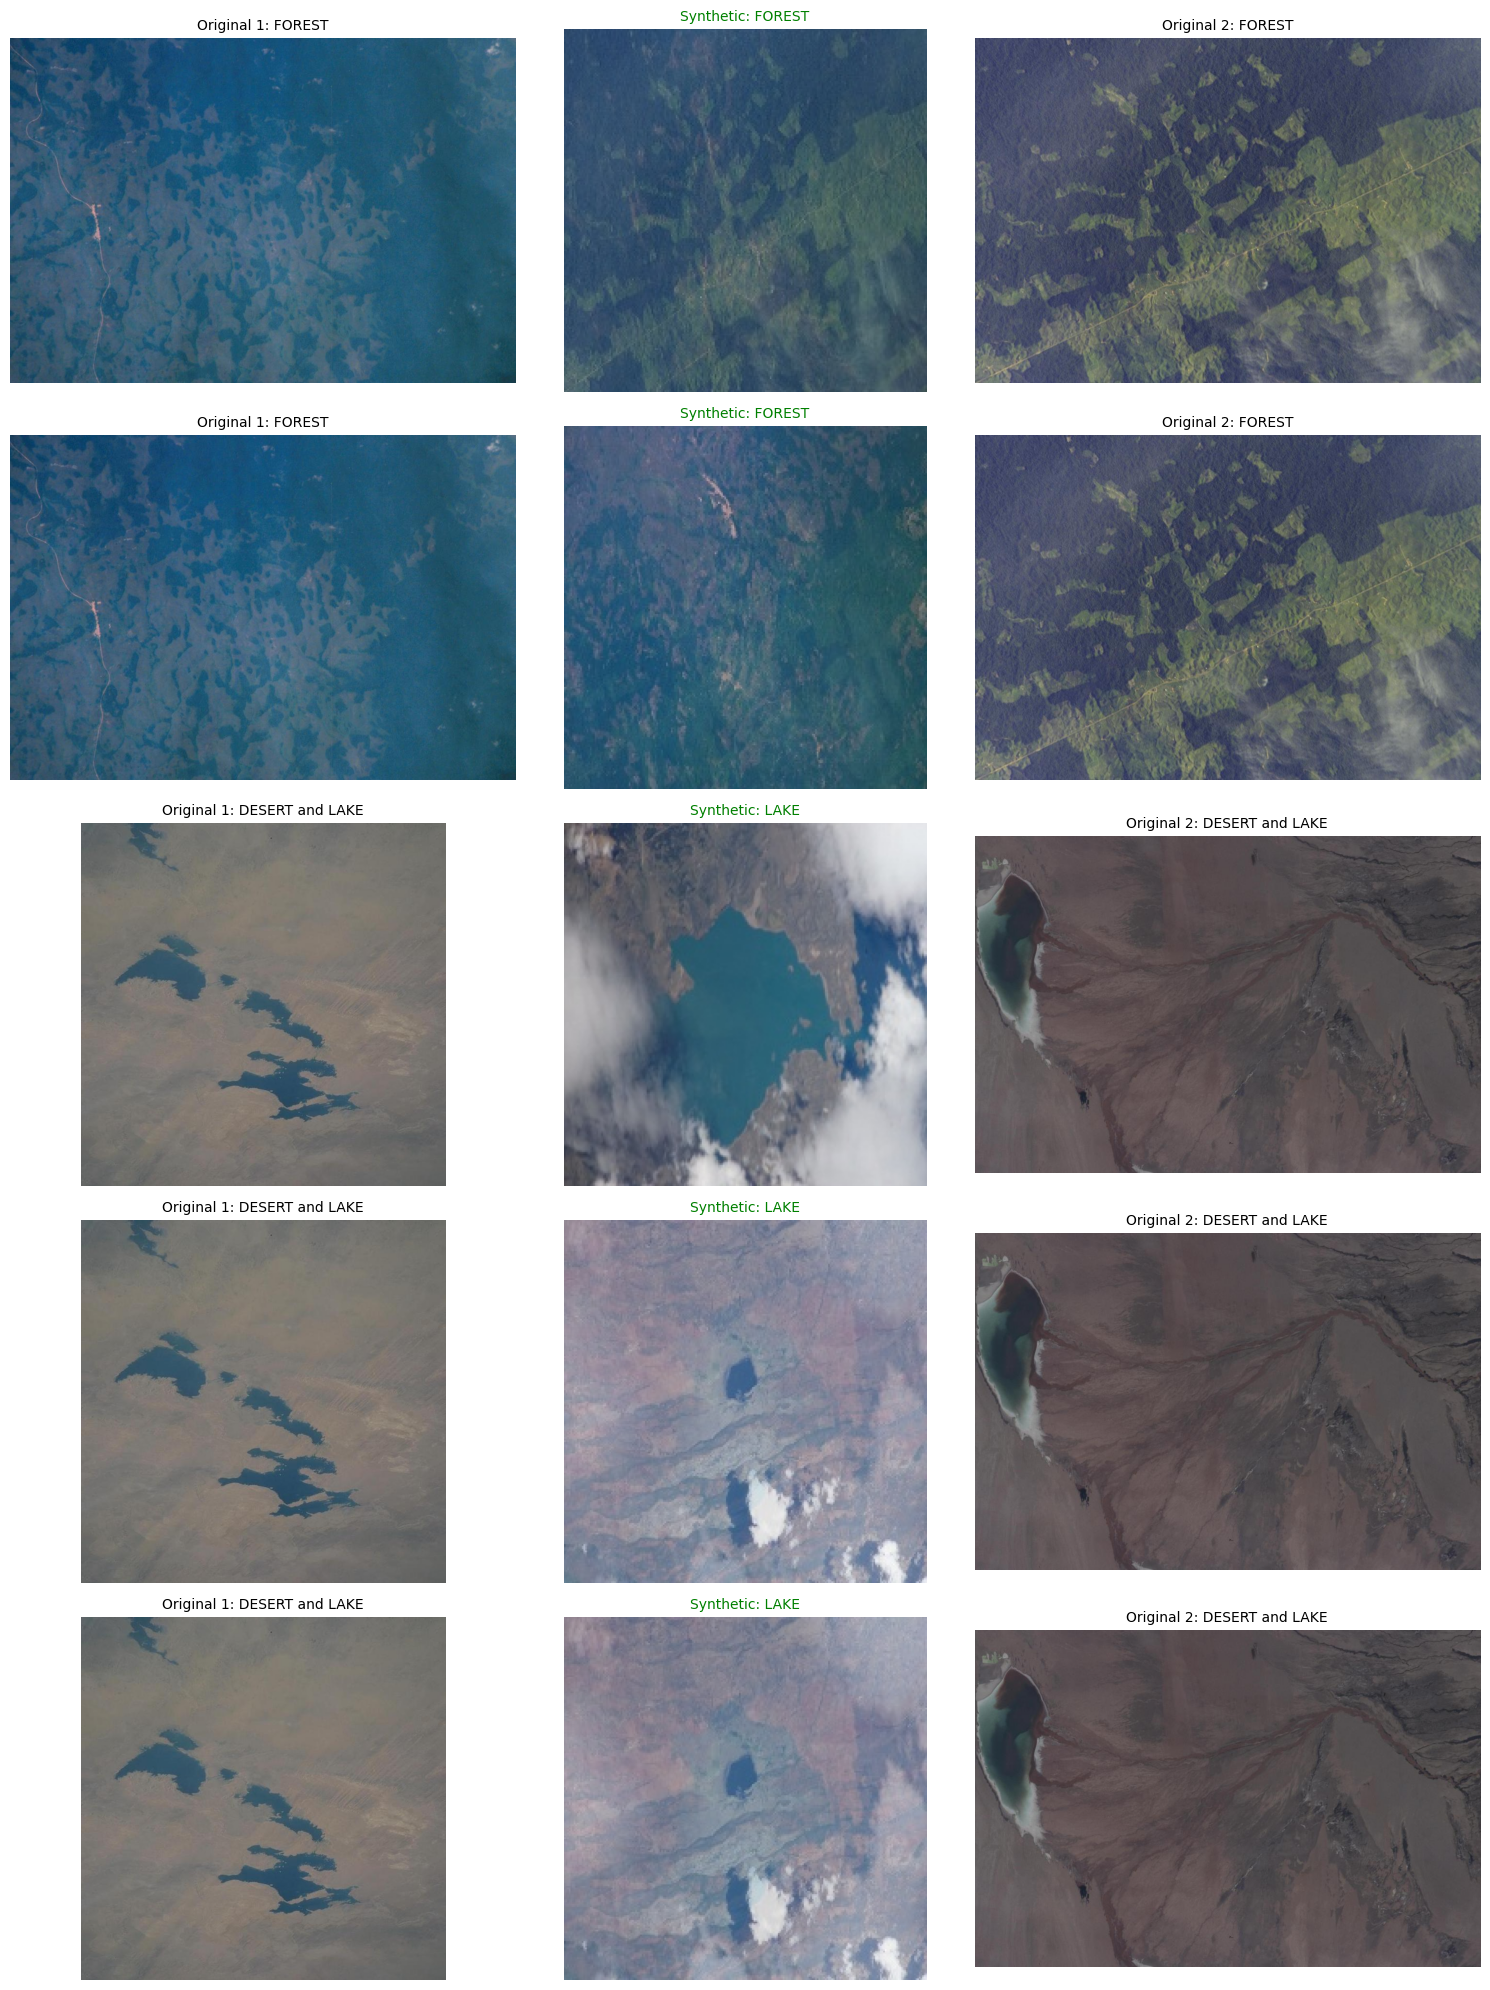

In [ ]:
def visualize_synthetic_samples(original_df, balanced_df, num_samples=15):
    """
    Visualize synthetic samples side by side with their closest original samples.
    """
    try:
        synthetic_samples = balanced_df[balanced_df['FileName'].str.contains('synthetic', case=False)]
        
        if len(synthetic_samples) == 0:
            print("No synthetic samples found to visualize.")
            return

        num_samples = min(num_samples, len(synthetic_samples))
        random_indices = np.random.choice(len(synthetic_samples), num_samples, replace=False)
        selected_synthetic = synthetic_samples.iloc[random_indices]
        
        plt.figure(figsize=(15, 4 * len(selected_synthetic)))
        
        for i, (_, syn_row) in enumerate(selected_synthetic.iterrows()):
            syn_img_path = os.path.join(Config.images_path, syn_row['FileName'])
            syn_label = syn_row['Label String']
            
            # Parse label vector safely
            label_data = syn_row['Label Vector']
            if isinstance(label_data, str):
                try:
                    label_vec = np.array(eval(label_data))
                except Exception:
                    try:
                        cleaned = label_data.strip('[]').split(',')
                        label_vec = np.array([int(x.strip()) for x in cleaned])
                    except:
                        label_vec = np.zeros(10)  # fallback
            else:
                label_vec = np.array(label_data)
            
            # Find similar originals
            source_samples = []
            for _, orig_row in original_df.iterrows():
                orig_label_data = orig_row['Label Vector']
                if isinstance(orig_label_data, str):
                    try:
                        orig_label_vec = np.array(eval(orig_label_data))
                    except Exception:
                        continue
                else:
                    orig_label_vec = np.array(orig_label_data)
                
                overlap = np.sum(np.logical_and(label_vec, orig_label_vec))
                if overlap > 0:
                    source_samples.append((orig_row, overlap))
            
            source_samples.sort(key=lambda x: x[1], reverse=True)
            source_samples = source_samples[:2]
            
            # Plot originals and synthetic
            plt.subplot(len(selected_synthetic), 3, i * 3 + 1)
            if source_samples:
                orig_img_path = os.path.join(Config.images_path, source_samples[0][0]['FileName'])
                orig_label = source_samples[0][0]['Label String']
                try:
                    orig_img = cv2.imread(orig_img_path)[:,:,::-1]
                    plt.imshow(orig_img)
                    plt.title(f"Original 1: {orig_label}", fontsize=10)
                except:
                    plt.text(0.5, 0.5, "Error loading image", ha='center', va='center')
                plt.axis('off')
            
            plt.subplot(len(selected_synthetic), 3, i * 3 + 2)
            try:
                syn_img = cv2.imread(syn_img_path)
                if syn_img is None:
                    plt.text(0.5, 0.5, "Image not found", ha='center', va='center')
                else:
                    plt.imshow(syn_img[:,:,::-1])
            except:
                plt.text(0.5, 0.5, "Error loading image", ha='center', va='center')
            plt.title(f"Synthetic: {syn_label}", fontsize=10, color='green')
            plt.axis('off')
            
            plt.subplot(len(selected_synthetic), 3, i * 3 + 3)
            if len(source_samples) > 1:
                orig_img_path = os.path.join(Config.images_path, source_samples[1][0]['FileName'])
                orig_label = source_samples[1][0]['Label String']
                try:
                    orig_img = cv2.imread(orig_img_path)[:,:,::-1]
                    plt.imshow(orig_img)
                    plt.title(f"Original 2: {orig_label}", fontsize=10)
                except:
                    plt.text(0.5, 0.5, "Error loading image", ha='center', va='center')
                plt.axis('off')
        
        plt.tight_layout()
        plt.show()

    except Exception as e:
        import traceback
        print(f"Error inside visualize_synthetic_samples: {str(e)}")
        traceback.print_exc()


# --- Call visualization ---
print("\nVisualizing synthetic samples.")
try:
    visualize_synthetic_samples(
        train_data_raw,             # original (full raw data)
        combo_balanced_train_data,  # balanced (with synthetics)
        num_samples=5,
    )
except Exception as e:
    import traceback
    print(f"Error visualizing synthetic samples: {str(e)}")
    traceback.print_exc()
    print("Continuing with model training...")


In [ ]:
class CombinationAwareLoss(nn.Module):
    """
    A loss function that takes into account label combinations
    
    This loss function puts higher weights on correctly predicting multiple labels
    together, thus improving performance on combined categories.
    """
    def __init__(self, individual_weights=None, combination_factor=1.5):

        super(CombinationAwareLoss, self).__init__()
        self.individual_weights = individual_weights
        self.combination_factor = combination_factor
        
    def forward(self, inputs, targets):

        # Standard BCE loss
        if self.individual_weights is not None:
            bce_loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.individual_weights, reduction='none'
            )
        else:
            bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        
        cardinality = torch.sum(targets, dim=1)
        
        cardinality_weights = 1.0 + (cardinality - 1) * (self.combination_factor - 1) / 9  # Normalized by max cardinality (10)
        cardinality_weights = torch.clamp(cardinality_weights, min=1.0)  # Ensure minimum weight is 1.0
        
        weighted_loss = bce_loss * cardinality_weights.unsqueeze(1)
        
        return torch.mean(weighted_loss)

class DependencyAwareLoss(nn.Module):
    """
    Loss function that explicitly models label dependencies
    
    This loss uses a correlation matrix to adjust the loss based on
    how labels typically co-occur in the dataset.
    """
    def __init__(self, correlation_matrix, individual_weights=None, dependency_weight=0.3):

        super(DependencyAwareLoss, self).__init__()
        self.individual_weights = individual_weights
        self.dependency_weight = dependency_weight
        
        correlation_sum = np.sum(correlation_matrix, axis=1, keepdims=True)
        correlation_sum[correlation_sum == 0] = 1  # Avoid division by zero
        norm_correlation = correlation_matrix / correlation_sum
        self.correlation = torch.FloatTensor(norm_correlation).to(Config.device)
        
    def forward(self, inputs, targets):
        if self.individual_weights is not None:
            bce_loss = F.binary_cross_entropy_with_logits(
                inputs, targets, pos_weight=self.individual_weights, reduction='mean'
            )
        else:
            bce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction='mean')
        
        probs = torch.sigmoid(inputs)
        
        expected_probs = torch.matmul(probs, self.correlation)
        
        dep_loss = F.kl_div(
            torch.log(probs + 1e-8),  # Add small epsilon to avoid log(0)
            expected_probs,
            reduction='batchmean'
        )
        
        total_loss = bce_loss + self.dependency_weight * dep_loss
        
        return total_loss

# Create combination-aware loss functions
combination_criterion = CombinationAwareLoss(
    individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
    combination_factor=2.0  # Weight multi-label samples twice as heavily
)

# Create dependency-aware loss using the co-occurrence matrix if combo_stats is available
# We need to check if combo_stats exists first
if 'combo_stats' in locals() and combo_stats is not None and 'cooccurrence_matrix' in combo_stats:
    dependency_criterion = DependencyAwareLoss(
        correlation_matrix=combo_stats['cooccurrence_matrix'],
        individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
        dependency_weight=0.3
    )
    print("Created combination-aware and dependency-aware loss functions")
else:
    print("Created combination-aware loss function only (combo_stats not available yet for dependency-aware loss)")
    # Create a dummy correlation matrix if needed
    dummy_matrix = np.eye(10)  # Identity matrix as fallback
    dependency_criterion = DependencyAwareLoss(
        correlation_matrix=dummy_matrix,
        individual_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights,
        dependency_weight=0.1  # Lower weight since we're using dummy data
    )

In [ ]:
# Recalculate positive weights using the balanced dataset
try:
    pos_weights = calculate_pos_weights(balanced_label_counts, strategy='inverse_freq')
    print("\nRecalculated positive weights for each class using balanced data:")
    for i, (label, weight) in enumerate(zip(individual_labels, pos_weights)):
        print(f"{label}: {weight:.3f}")

    # Update loss functions with new weights
    weighted_criterion = WeightedBCEWithLogitsLoss(pos_weights=pos_weights.to(Config.device) if torch.cuda.is_available() else pos_weights)
except Exception as e:
    print(f"\nError recalculating positive weights: {str(e)}")
    print("Continuing with original weights...")

## Custom Image Dataset

A PyTorch Custom Image Dataset is a class that inherits from PyTorch's Dataset class which provides a way to create a dataset that is tailored to your requirements and needs. It integrates efficiently with PyTorch's DataLoader, allowing us to load and process images in batches during model training and validation

#### What is it used for?
- Data Loading: Standardized way to load images and labels from disk.
- Data Preprocessing: Consistent application of transformations (resizing, augmentation, etc.) to images.
- Batch Creation: Mini-batch generation for training.
- Memory Efficiency: Load images only when needed rather than storing entire dataset in memory. 

Provided below is a custom image dataset that you may use for this challenge. You may add your own modifications by reading through [PyTorch's documentation](https://docs.pytorch.org/tutorials/beginner/basics/data_tutorial.html). 

In [20]:
class CustomImageDataset(Dataset):
    def __init__(self, dataset, img_dir, transform=None, target_transform=None):
        self.dataset = dataset.reset_index(drop=True)  # Reset index to avoid issues
        self.image_labels = list(dataset['Label Vector'])
        self.image_path = list(dataset['FileName'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.dataset)
        
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.dataset.iloc[idx]['FileName'])
        image = cv2.imread(img_path)
        
        if image is None:
            # If image not found, it might be a synthetic image with a different path structure
            # Try alternative path formats
            alt_paths = [
                os.path.join(self.img_dir, self.dataset.iloc[idx]['FileName']),
                os.path.join(self.img_dir, '..', self.dataset.iloc[idx]['FileName']),
                self.dataset.iloc[idx]['FileName']  # Direct path if it's absolute
            ]
            
            for path in alt_paths:
                image = cv2.imread(path)
                if image is not None:
                    break
                    
            if image is None:
                raise ValueError(f"Could not load image: {img_path} (tried alternative paths)")
            
        # Convert BGR to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Apply resize and normalize if no transform, otherwise let transform handle it
        if self.transform is None:
            image = resize_normalize(image)
        else:
            # For transforms that expect PIL/tensor format
            image = self.transform(image)
        
        # Get label
        label = self.dataset.iloc[idx]['Label Vector']
        label = torch.tensor(eval(label), dtype=torch.float32)
        
        if self.target_transform:
            label = self.target_transform(label)
            
        return image, label

### Image Augmentation

Image augmentation is an absolutely wonderful way to artificially expand your training dataset, which is especially valuable when working with limited data — a common constraint in real-world image tasks. By creating variations of existing images through transformations like rotations, flips, zooms, and crops, you essentially teach your CNN to recognize objects under different viewing conditions without collecting additional data.

More fundamentally, augmentation directly addresses overfitting by preventing the network from memorizing exact pixel patterns. When a CNN sees the same exact images repeatedly, it tends to learn specific pixel configurations rather than generalizable features. By presenting slightly different versions each time, you force the network to learn robust representations that capture the essence of objects rather than superficial details.

Augmentation also introduces invariance properties into your model. For classification tasks, whether an image is slightly rotated, zoomed, or shifted shouldn't change the label. By training with these variations, your CNN develops translation, rotation, and scale invariance—crucial properties for real-world deployment where objects rarely appear in perfectly consistent positions or orientations.

The CustomImageDataset created above is setup to handle image transforms. A blank example is provided below. See documentation [here](https://docs.pytorch.org/vision/stable/transforms.html?highlight=compose)


In [21]:
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),                     # Larger resize
    transforms.RandomCrop((224, 224)),                 # Random crop
    transforms.RandomHorizontalFlip(p=0.5),            # Horizontal flip
    transforms.RandomVerticalFlip(p=0.3),              # Vertical flip (lower prob for geography)
    transforms.RandomRotation(degrees=15),             # Slightly larger rotation
    transforms.RandomAffine(
        degrees=0, 
        translate=(0.1, 0.1), 
        scale=(0.9, 1.1), 
        shear=5
    ),                                                 # Affine transform
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Perspective distortion
    transforms.ColorJitter(
        brightness=0.15, 
        contrast=0.15, 
        saturation=0.15, 
        hue=0.05
    ),                                                 # Stronger color jitter
    transforms.RandomGrayscale(p=0.1),                 # Occasionally grayscale
    transforms.ToTensor(),
    transforms.RandomApply(
        [transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))], 
        p=0.3
    ),                                                 # Gaussian blur
    transforms.RandomErasing(
        p=0.25, scale=(0.02, 0.15), ratio=(0.3, 3.3), value="random"
    ),                                                 # Cutout-style erasing
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )                                                  # ImageNet normalization
])

# Validation transform (no augmentation)
val_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create base datasets
train_ds = CustomImageDataset(train_data_raw, Config.images_path, transform=train_transform)
valid_ds = CustomImageDataset(val_data_raw, Config.images_path, transform=val_transform)

print(f"Final training dataset size: {len(train_ds)}")
print(f"Validation dataset size: {len(valid_ds)}")

Final training dataset size: 1373
Validation dataset size: 765


### CNN Model Architecture

There are two ways to approaching the model architecture phase of the problem. 

1. Building your own CNN architecture. An example is provided below where modifications can be made. 
2. Using pretrained models.

### Building Your Own CNN Architecture

__Advantages:__

- Complete control over the architecture design. 
- Freedom to experiment with novel layer arrangements, activation functions, and skip connections.
- No constraints from pretrained weights or architectures that may not be optimal for your domain.
- Typically results in a smaller, more compute efficient model since you only include what you need.

__Disadvantages:__

- Requires a bit more expertise and understanding of Neural Network design
- More epochs are needed as learning must start from random initialization
- Needs much more data to achieve good performance (often prohibitively large amounts)
- Higher risk of overfitting, especially with limited data

### Using Pretrained Models

__Advantages:__

- Leverage powerful feature extractors trained on massive datasets (like ImageNet with 1.2M images)
- Dramatically reduced training time and computational requirements (though more compute resources are needed to get started)
- Excellent performance even with limited domain-specific data
- Built-in robustness against common image variations and noise
- Access to state-of-the-art architectures (ResNet, EfficientNet, Vision Transformers) without designing them

__Disadvantages:__

- Less control over the underlying architecture
- May include unnecessary complexity for simpler tasks
- Domain shift can be problematic if your images differ significantly from pretraining data
- Fixed input requirements (resolution, channels) that may require preprocessing



In [22]:
from timm import create_model
from huggingface_hub import hf_hub_download

# Download pretrained weights (pytorch_model.bin) from HuggingFace
ckpt_path = hf_hub_download(repo_id="cm93/resnet50-eurosat", filename="pytorch_model.bin")
# Initialize ResNet-50 for 10 classes
pt_model = create_model('resnet50', pretrained=False, num_classes=10)
pt_model.load_state_dict(torch.load(ckpt_path, map_location=torch.device('cuda')))

print("Model successfully loaded on GPU")

Model successfully loaded on GPU


## Model Training

#### Modified the traning function so we have more versality in viewing the results (saving the best F1 score), and applying an adaptive Learning Rate.

In [24]:

def train_model_enhanced(
    model, train_ds, valid_ds, epochs, learning_rate, num_classes, version, 
    criterion
):
        
    # Map label indices to names for better logging
    label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
        
    os.makedirs('model_checkpoints/', exist_ok=True)
    torch.manual_seed(39) # set seed
    model = model.to(Config.device)
    model_name = model.__class__.__name__
    print(f"Model: {model_name}")
    
    workers = min(os.cpu_count() - 1, 4)
    train_dataloader = DataLoader(
        train_ds, batch_size=Config.batch_size, shuffle=True, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    valid_dataloader = DataLoader(
        valid_ds, batch_size=Config.batch_size, shuffle=False, 
        num_workers=workers, prefetch_factor=6, pin_memory=True
    )
    
    # Choose loss function
    if criterion == "FocalLoss":
        criterion = FocalLoss(alpha=1, gamma=2)
        print("Using Focal Loss")
    elif criterion == "WeightedBCE":
        criterion = weighted_criterion
        print("Using Weighted BCE Loss")
    elif criterion == "CombinationAware":
        criterion = combination_criterion
        print("Using Combination-Aware Loss")
    elif criterion == "DependencyAware":
        criterion = dependency_criterion
        print("Using Dependency-Aware Loss")
    else:
        criterion = nn.BCEWithLogitsLoss()
        print("Using standard BCEWithLogitsLoss")
    
    optimizer = torch.optim.AdamW(
        model.parameters(), lr=learning_rate, 
        weight_decay=Config.weight_decay, betas=(0.9, 0.999)
    )
    
    scheduler = ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, 
        min_lr=1e-6, verbose=True
    )
    
    # Training history
    history = {
        'train_loss': [], 'val_loss': [], 
        'train_f1': [], 'val_f1': [],
        'learning_rates': [],
        'class_f1_scores': [],  
    }
    
    
    best_val_f1 = 0.0
    patience_counter = 0
    
    for epoch in range(1, epochs + 1):
        # Training phase
        model.train()
        train_loss = 0.0
        train_f1 = 0.0
        
        # For tracking per-class metrics
        all_train_preds = []
        all_train_labels = []
        
        for x_batch, y_batch in tqdm(train_dataloader, desc=f"Epoch {epoch}/{epochs} - Training"):
            x_batch = x_batch.to(Config.device)
            y_batch = y_batch.to(Config.device)
            
            optimizer.zero_grad()
            pred = model(x_batch)
            loss = criterion(pred, y_batch.float())
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            
            train_loss += loss.item()
            
            # Calculate F1 score
            with torch.no_grad():
                pred_sigmoid = torch.sigmoid(pred)
                pred_binary = (pred_sigmoid > Config.threshold).float()
                batch_f1 = f1_score(
                    to_numpy(pred_binary), to_numpy(y_batch), 
                    average='micro', zero_division=0
                )
                train_f1 += batch_f1
                
                # Store predictions and labels for per-class metrics
                all_train_preds.append(to_numpy(pred_binary))
                all_train_labels.append(to_numpy(y_batch))
        
        # Average training metrics
        train_loss /= len(train_dataloader)
        train_f1 /= len(train_dataloader)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_f1 = 0.0
        
        # For tracking per-class metrics
        all_val_preds = []
        all_val_labels = []
        
        with torch.no_grad():
            for x_val, y_val in tqdm(valid_dataloader, desc=f"Epoch {epoch}/{epochs} - Validation"):
                x_val = x_val.to(Config.device)
                y_val = y_val.to(Config.device)
                
                pred = model(x_val)
                loss = criterion(pred, y_val.float())
                val_loss += loss.item()
                
                pred_sigmoid = torch.sigmoid(pred)
                pred_binary = (pred_sigmoid > Config.threshold).float()
                batch_f1 = f1_score(
                    to_numpy(pred_binary), to_numpy(y_val), 
                    average='micro', zero_division=0
                )
                val_f1 += batch_f1
                
                # Store predictions and labels for per-class metrics
                all_val_preds.append(to_numpy(pred_binary))
                all_val_labels.append(to_numpy(y_val))
        
        # Average validation metrics
        val_loss /= len(valid_dataloader)
        val_f1 /= len(valid_dataloader)
        
        # Calculate per-class F1 scores to monitor MLSMOTE effectiveness
        train_preds_concat = np.vstack(all_train_preds)
        train_labels_concat = np.vstack(all_train_labels)
        val_preds_concat = np.vstack(all_val_preds)
        val_labels_concat = np.vstack(all_val_labels)
        
        class_f1_scores = {
            'train': f1_score(train_labels_concat, train_preds_concat, average=None, zero_division=0),
            'val': f1_score(val_labels_concat, val_preds_concat, average=None, zero_division=0)
        }
        
        scheduler.step(val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        # Save history
        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_f1'].append(train_f1)
        history['val_f1'].append(val_f1)
        history['learning_rates'].append(current_lr)
        history['class_f1_scores'].append(class_f1_scores)
        
        # Print metrics
        print(f"Epoch {epoch}/{epochs}:")
        print(f"Train Loss: {train_loss:.4f}, Train F1: {train_f1:.4f}")
        print(f"Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}")
        print(f"Learning Rate: {current_lr:.6f}")
        
        print("\nPer-class F1 scores (validation):")        
        # Save best model
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            # Create a serializable config dict
            config_dict = {
                'img_dimensions': Config.img_dimensions,
                'batch_size': Config.batch_size,
                'initial_learning_rate': Config.initial_learning_rate,
                'num_epochs': Config.num_epochs,
                'weight_decay': Config.weight_decay,
                'threshold': Config.threshold,
                'patience': Config.patience
            }
            torch.save({
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'epoch': epoch,
                'best_val_f1': best_val_f1,
                'config': config_dict
            }, f'model_checkpoints/best_model_{version}_{model_name}.pt')
            patience_counter = 0
            print(f"New best validation F1: {best_val_f1:.4f}")
        else:
            patience_counter += 1
        
            
        if patience_counter >= Config.patience:
            print(f"Early stopping triggered after {Config.patience} epochs without improvement")
            break
        
        print("-" * 50)
    
    # Load best model
    checkpoint = torch.load(f'model_checkpoints/best_model_{version}_{model_name}.pt')
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()
    
    print(f"Training completed. Best validation F1: {best_val_f1:.4f}")
    
    # Plot per-class F1 improvement over epochs
    plt.figure(figsize=(12, 8))
    epochs_range = range(1, len(history['class_f1_scores']) + 1)

    # ---- Plot per-class F1 (validation) ----
    plt.figure(figsize=(12, 8))
    for class_idx, class_name in enumerate(label_names):
        per_class_vals = [epoch_scores['val'][class_idx] for epoch_scores in history['class_f1_scores']]
        plt.plot(epochs_range, per_class_vals, label=class_name)
    plt.title("Per-Class F1 Score Improvement (Validation)")
    plt.xlabel("Epoch")
    plt.ylabel("F1 Score")
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    return model, history

### Training Execution Function

In [25]:
model, history = train_model_enhanced(
    pt_model, train_ds, valid_ds, 
    Config.num_epochs, 
    learning_rate=Config.initial_learning_rate, 
    num_classes=10, 
    version=44,  
    criterion="FocalLoss"
)

# Extract metrics from history for compatibility with visualization
f1_hist_train = history['train_f1']
f1_hist_val = history['val_f1']
train_losses = history['train_loss']
val_losses = history['val_loss']

Model: ResNet
Using Focal Loss


Epoch 1/50 - Training:   0%|          | 0/4 [00:06<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 148.00 MiB. GPU 0 has a total capacity of 21.95 GiB of which 6.12 MiB is free. Process 31594 has 21.94 GiB memory in use. Of the allocated memory 21.68 GiB is allocated by PyTorch, and 48.94 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

## Visualize Metrics

In [ ]:
# Find optimal threshold after training
print("Finding optimal threshold...")
valid_dataloader = DataLoader(
    valid_ds, batch_size=Config.batch_size, shuffle=False, 
    num_workers=4, prefetch_factor=4, pin_memory=True
)

optimal_threshold, best_f1_threshold = find_optimal_threshold(model, valid_dataloader)

# Update config with optimal threshold
Config.threshold = optimal_threshold
print(f"Updated threshold to: {Config.threshold}")


In [ ]:
# Test Time Augmentation (TTA) for improved predictions
def test_time_augmentation(model, dataloader, num_tta=5):
    """
    Apply test time augmentation to improve predictions
    """
    model.eval()
    all_predictions = []
    all_labels = []
    
    # TTA transforms
    tta_transforms = [
        transforms.Compose([
            transforms.ToPILImage(),
            transforms.Resize((224, 224)),
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.3),
            transforms.RandomRotation(degrees=5),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]) for _ in range(num_tta)
    ]
    
    with torch.no_grad():
        for x, y in tqdm(dataloader, desc="TTA Predictions"):
            batch_predictions = []
            
            # Original prediction
            x_orig = x.to(Config.device)
            pred_orig = torch.sigmoid(model(x_orig))
            batch_predictions.append(to_numpy(pred_orig))
            
            # TTA predictions
            for i in range(num_tta):
                # Apply augmentation to each image in batch
                x_aug_batch = []
                for img_idx in range(x.shape[0]):
                    # Convert tensor back to PIL for augmentation
                    img_np = to_numpy(x[img_idx].permute(1, 2, 0))
                    img_np = (img_np * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
                    img_np = np.clip(img_np, 0, 255).astype(np.uint8)
                    
                    # Apply TTA transform
                    img_aug = tta_transforms[i](img_np)
                    x_aug_batch.append(img_aug)
                
                x_aug = torch.stack(x_aug_batch).to(Config.device)
                pred_aug = torch.sigmoid(model(x_aug))
                batch_predictions.append(to_numpy(pred_aug))
            
            # Average all predictions
            avg_prediction = np.mean(batch_predictions, axis=0)
            all_predictions.append(avg_prediction)
            all_labels.append(to_numpy(y))
    
    return np.vstack(all_predictions), np.vstack(all_labels)

print("Test Time Augmentation function ready!")

In [ ]:
# Model Ensemble for improved performance
def ensemble_predictions(models, dataloader, weights=None):
    """
    Combine predictions from multiple models
    """
    if weights is None:
        weights = [1.0 / len(models)] * len(models)
    
    all_predictions = []
    all_labels = []
    
    with torch.no_grad():
        for x, y in tqdm(dataloader, desc="Ensemble Predictions"):
            x = x.to(Config.device)
            batch_predictions = []
            
            # Get predictions from each model
            for i, model in enumerate(models):
                model.eval()
                pred = torch.sigmoid(model(x))
                weighted_pred = to_numpy(pred) * weights[i]
                batch_predictions.append(weighted_pred)
            
            # Average weighted predictions
            ensemble_pred = np.sum(batch_predictions, axis=0)
            all_predictions.append(ensemble_pred)
            all_labels.append(to_numpy(y))
    
    return np.vstack(all_predictions), np.vstack(all_labels)

print("Ensemble prediction function ready!")

In [ ]:
# Advanced threshold optimization with per-class thresholds
def find_optimal_per_class_thresholds(model, valid_dataloader, num_classes=10):
    """
    Find optimal threshold for each class separately
    """
    model.eval()
    
    # Collect all predictions and labels
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for x, y in tqdm(valid_dataloader, desc="Collecting predictions for per-class optimization"):
            x, y = x.to(Config.device), y.to(Config.device)
            pred = model(x)
            pred_sigmoid = torch.sigmoid(pred)
            
            all_preds.append(to_numpy(pred_sigmoid))
            all_labels.append(to_numpy(y))
    
    all_preds = np.vstack(all_preds)
    all_labels = np.vstack(all_labels)
    
    # Find optimal threshold for each class
    optimal_thresholds = []
    best_f1_scores = []
    
    for class_idx in range(num_classes):
        best_threshold = 0.5
        best_f1 = 0.0
        
        for threshold in np.arange(0.1, 0.9, 0.05):
            pred_binary = (all_preds[:, class_idx] > threshold).astype(int)
            f1 = f1_score(all_labels[:, class_idx], pred_binary, zero_division=0)
            
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
        
        optimal_thresholds.append(best_threshold)
        best_f1_scores.append(best_f1)
        print(f"Class {class_idx}: Optimal threshold = {best_threshold:.2f}, F1 = {best_f1:.4f}")
    
    # Test overall performance with per-class thresholds
    pred_binary_optimized = np.zeros_like(all_preds)
    for class_idx in range(num_classes):
        pred_binary_optimized[:, class_idx] = (all_preds[:, class_idx] > optimal_thresholds[class_idx]).astype(int)
    
    overall_f1 = f1_score(all_labels, pred_binary_optimized, average='micro', zero_division=0)
    print(f"\nOverall F1 with per-class thresholds: {overall_f1:.4f}")
    
    return optimal_thresholds, best_f1_scores, overall_f1

print("Per-class threshold optimization function ready!")

In [ ]:
# Run advanced threshold optimization
print("\n=== ADVANCED THRESHOLD OPTIMIZATION ===")
print("Finding optimal per-class thresholds...")

valid_dataloader = DataLoader(
    valid_ds, batch_size=Config.batch_size, shuffle=False, 
    num_workers=4, prefetch_factor=4, pin_memory=True
)

# Find per-class optimal thresholds
per_class_thresholds, per_class_f1s, optimized_f1 = find_optimal_per_class_thresholds(model, valid_dataloader)

# Compare with global threshold
print(f"\nComparison:")
print(f"Global threshold ({Config.threshold:.2f}): F1 = {best_f1_threshold:.4f}")
print(f"Per-class thresholds: F1 = {optimized_f1:.4f}")

if optimized_f1 > best_f1_threshold:
    print("\nUsing per-class thresholds for final evaluation!")
    Config.use_per_class_thresholds = True
    Config.per_class_thresholds = per_class_thresholds
else:
    print("\nUsing global threshold for final evaluation!")
    Config.use_per_class_thresholds = False

In [ ]:
x_axis = np.arange(len(train_losses)) + 1
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_axis, train_losses, '-o', label = 'Train loss')
ax.plot(x_axis, val_losses, '--<', label = 'Validation loss')
ax.legend(fontsize=15)
ax.grid(True)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_axis, f1_hist_train, '-o', label='Train F1')
ax.plot(x_axis, f1_hist_val, '--<', label='Validation F1')        
ax.legend(fontsize=15)
ax.grid(True)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Metric', size=15)
plt.show()

## Grade Model (on validation set)

In [ ]:
test_ds = CustomImageDataset(val_data_raw, Config.images_path, transform=val_transform)
test_dl = DataLoader(
    test_ds, batch_size=Config.batch_size, shuffle=False, num_workers=8, prefetch_factor=8,  
    pin_memory=True, persistent_workers=True
)

criterion = nn.BCEWithLogitsLoss()
actual_labels = []
predicted_labels = []
image_paths = []  # To store paths of processed images
incorrect_predictions = []  # To store (image_path, actual, predicted) for incorrect predictions


f1_test = 0.0
image_idx = 0  # Keep track of position in dataset

with torch.no_grad():
    test_loss = 0.0
    for x, y in tqdm(test_dl):
        batch_size = x.shape[0]
        x, y = x.to(Config.device), y.to(Config.device)
        pred = model(x)
        loss = criterion(pred, y.float())
        test_loss += loss.item()
        pred = torch.sigmoid(pred)
        
        # Apply global or per-class thresholds
        if hasattr(Config, 'use_per_class_thresholds') and Config.use_per_class_thresholds:
            # Apply different threshold for each class
            pred_np = np.zeros_like(to_numpy(pred))
            for i in range(pred.shape[1]):
                pred_np[:, i] = (to_numpy(pred[:, i]) > Config.per_class_thresholds[i]).astype(int)
        else:
            # Use global threshold
            pred_np = to_numpy((pred > Config.threshold).int())
            
        # Convert to numpy for easier handling
        y_np = to_numpy(y)
        
        # Calculate F1 score for this batch
        is_correct = f1_score(pred_np, y_np, average='micro')
        f1_test += is_correct
        
        # Store batch results
        actual_labels.append(y_np)
        predicted_labels.append(pred_np)
        
        # Track FOREST-specific results
        for i in range(batch_size):
            curr_idx = image_idx + i
            if curr_idx < len(test_ds):
                img_path = val_data_raw.iloc[curr_idx]['FileName']
                
                # For all samples
                if not np.array_equal(pred_np[i], y_np[i]):
                    incorrect_predictions.append({
                        'image_path': img_path,
                        'actual': y_np[i],
                        'predicted': pred_np[i]
                    })
                
        
        # Update image index for next batch
        image_idx += batch_size
        
    f1_test /= np.ceil(len(test_dl.dataset)/Config.batch_size)

print(f'Validation F1: {f1_test}')



## Where the model is underperforming

In [ ]:
# Enhanced function to plot and analyze incorrect predictions
def plot_incorrect_predictions(incorrect_preds, label_names=None, max_images=30, focus_combinations=True):
    """
    Plot images with incorrect predictions with focus on combined categories
    
    Parameters:
    - incorrect_preds: List of dicts with keys 'image_path', 'actual', 'predicted'
    - label_names: List of label names corresponding to positions in one-hot vector
    - max_images: Maximum number of images to plot
    - focus_combinations: Whether to prioritize showing multi-label examples
    """
    if not incorrect_preds:
        print("No incorrect predictions to display.")
        return
        
    # If focusing on combinations, prioritize multi-label examples
    if focus_combinations:
        # Calculate cardinality (number of labels) for each sample
        for pred in incorrect_preds:
            pred['actual_cardinality'] = np.sum(pred['actual'])
            pred['pred_cardinality'] = np.sum(pred['predicted'])
        
        # Sort by actual cardinality (descending)
        incorrect_preds = sorted(incorrect_preds, key=lambda x: x['actual_cardinality'], reverse=True)
    
    # Limit number of images to display
    num_to_show = min(max_images, len(incorrect_preds))
    
    # Calculate grid size
    grid_size = int(np.ceil(np.sqrt(num_to_show)))
    
    plt.figure(figsize=(20, 20))
    
    for i in range(num_to_show):
        plt.subplot(grid_size, grid_size, i + 1)
        
        # Load and display image
        img_path = os.path.join(Config.images_path, incorrect_preds[i]['image_path'])
        try:
            img = plt.imread(img_path)
            plt.imshow(img)
        except Exception as e:
            plt.text(0.5, 0.5, f"Error loading image: {str(e)}", ha='center', va='center')
        
        # Format actual and predicted labels
        actual = incorrect_preds[i]['actual']
        predicted = incorrect_preds[i]['predicted']
        
        if label_names:
            # Convert one-hot encoded vectors to label names
            actual_labels_text = ', '.join([label_names[j] for j, val in enumerate(actual) if val == 1])
            pred_labels_text = ', '.join([label_names[j] for j, val in enumerate(predicted) if val == 1])
            if not actual_labels_text:
                actual_labels_text = "None"
            if not pred_labels_text:
                pred_labels_text = "None"
        else:
            # Display raw vectors
            actual_indices = [j for j, val in enumerate(actual) if val == 1]
            pred_indices = [j for j, val in enumerate(predicted) if val == 1]
            actual_labels_text = f"[{', '.join(map(str, actual_indices))}]"
            pred_labels_text = f"[{', '.join(map(str, pred_indices))}]"
        
        # Highlight cardinality information if focusing on combinations
        if focus_combinations:
            actual_cardinality = incorrect_preds[i]['actual_cardinality']
            pred_cardinality = incorrect_preds[i]['pred_cardinality']
            title_text = f"Actual ({actual_cardinality}): {actual_labels_text}\nPredicted ({pred_cardinality}): {pred_labels_text}"
        else:
            title_text = f"Actual: {actual_labels_text}\nPredicted: {pred_labels_text}"
        
        # Set title with color based on whether it's a multi-label sample
        title_color = 'red' if incorrect_preds[i].get('actual_cardinality', 0) > 1 else 'black'
        plt.title(title_text, fontsize=10, color=title_color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Analyze incorrect predictions with focus on label combinations
def analyze_combination_errors(incorrect_preds, label_names):
    """
    Analyze errors specifically for multi-label samples
    
    Parameters:
    -----------
    incorrect_preds: list
        List of dictionaries with incorrect predictions
    label_names: list
        List of label names
    """
    # Calculate error types
    error_types = {
        'multi_to_single': 0,  # Multi-label predicted as single-label
        'single_to_multi': 0,  # Single-label predicted as multi-label
        'wrong_combo': 0,      # Correct cardinality but wrong labels
        'partial_match': 0,    # Some labels correct, some wrong
        'complete_mismatch': 0 # No labels correct
    }
    
    # Categorize each error
    for pred in incorrect_preds:
        actual = pred['actual']
        predicted = pred['predicted']
        
        actual_labels = set([j for j, val in enumerate(actual) if val == 1])
        pred_labels = set([j for j, val in enumerate(predicted) if val == 1])
        
        actual_cardinality = len(actual_labels)
        pred_cardinality = len(pred_labels)
        
        common_labels = actual_labels.intersection(pred_labels)
        
        if actual_cardinality > 1 and pred_cardinality == 1:
            error_types['multi_to_single'] += 1
        elif actual_cardinality == 1 and pred_cardinality > 1:
            error_types['single_to_multi'] += 1
        elif actual_cardinality == pred_cardinality and len(common_labels) == 0:
            error_types['wrong_combo'] += 1
        elif len(common_labels) > 0 and len(common_labels) < max(actual_cardinality, pred_cardinality):
            error_types['partial_match'] += 1
        else:
            error_types['complete_mismatch'] += 1
    
    # Print analysis
    print("\nAnalysis of Errors in Multi-Label Classification:")
    print("-" * 50)
    print(f"Total incorrect predictions: {len(incorrect_preds)}")
    
    for error_type, count in error_types.items():
        percentage = count / len(incorrect_preds) * 100
        print(f"{error_type}: {count} ({percentage:.2f}%)")
    
    # Plot error types
    plt.figure(figsize=(10, 6))
    plt.bar(error_types.keys(), error_types.values(), color='coral')
    plt.title('Types of Errors in Multi-Label Classification')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Find the most common label pairs that are confused
    confused_pairs = []
    
    for pred in incorrect_preds:
        actual = pred['actual']
        predicted = pred['predicted']
        
        actual_labels = [label_names[j] for j, val in enumerate(actual) if val == 1]
        pred_labels = [label_names[j] for j, val in enumerate(predicted) if val == 1]
        
        # Check for labels in actual but not in predicted
        for label in actual_labels:
            if label not in pred_labels:
                confused_pairs.append((label, 'missed'))
        
        # Check for labels in predicted but not in actual
        for label in pred_labels:
            if label not in actual_labels:
                confused_pairs.append((label, 'falsely_added'))
    
    # Count frequencies
    confused_pair_counts = Counter(confused_pairs)
    
    # Print the most common confusion patterns
    print("\nMost Common Label Confusion Patterns:")
    print("-" * 50)
    
    missed_labels = [(label, count) for (label, error_type), count in confused_pair_counts.items() if error_type == 'missed']
    falsely_added = [(label, count) for (label, error_type), count in confused_pair_counts.items() if error_type == 'falsely_added']
    
    print("Most commonly missed labels:")
    for label, count in sorted(missed_labels, key=lambda x: x[1], reverse=True)[:5]:
        print(f"{label}: missed {count} times")
    
    print("\nMost commonly falsely added labels:")
    for label, count in sorted(falsely_added, key=lambda x: x[1], reverse=True)[:5]:
        print(f"{label}: falsely added {count} times")

# Plot incorrect predictions with focus on multi-label samples
label_names = ['BEACH', 'CITY', 'COAST', 'DESERT', 'FOREST', 'ISLAND', 'LAKE', 'MOUNTAIN', 'RIVER', 'SNOW']
plot_incorrect_predictions(incorrect_predictions, label_names=label_names, focus_combinations=True)

# Analyze errors with focus on label combinations
analyze_combination_errors(incorrect_predictions, label_names)

## Confusion Matrix

In [ ]:
def create_multilabel_confusion_matrix(y_true_arrays, y_pred_arrays, test_data_raw):
    valid_combinations = []
    valid_label_names = {}
    
    # unique label vectors from test data
    for _, row in test_data_raw.drop_duplicates(subset=['Label Vector']).iterrows():
        label_vector = np.array(row['Label Vector'].strip('[]').split(', '), dtype=int)
        if isinstance(label_vector, np.ndarray):
            vector_tuple = tuple(label_vector.flatten())
        else:
            for arr in label_vector:
                if isinstance(arr, np.ndarray):
                    vector_tuple = tuple(arr.flatten())
                    break
                    
        valid_combinations.append(vector_tuple)
        valid_label_names[vector_tuple] = row['Label String']
    
    # add "Other" category
    other_idx = len(valid_combinations)
    
    # convert true and predicted arrays to tuples
    y_true_tuples = []
    y_pred_tuples = []
    
    for array in y_true_arrays:
        for row in array:
            y_true_tuples.append(tuple(row))
            
    for array in y_pred_arrays:
        for row in array:
            y_pred_tuples.append(tuple(row))
    
    # Map each tuple to the index of its class or to "Other"
    def get_class_index(tup):
        if tup in valid_combinations:
            return valid_combinations.index(tup)
        else:
            return other_idx
    
    # convert tuples to class indices
    y_true_indices = [get_class_index(t) for t in y_true_tuples]
    y_pred_indices = [get_class_index(t) for t in y_pred_tuples]
    
    # create labels for the confusion matrix
    labels = [valid_label_names[combo] for combo in valid_combinations] + ["Other"]
    
    # create the confusion matrix
    cm = confusion_matrix(y_true_indices, y_pred_indices, 
                          labels=range(len(valid_combinations) + 1))
    
    # create a DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    return cm, cm_df, labels

def plot_confusion_matrix(cm_df, labels, figsize=(15, 15)):
    # create the plot
    plt.figure(figsize=figsize)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix for Multilabel Classification')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    return plt.gcf()

cm, cm_df, labels = create_multilabel_confusion_matrix(
    actual_labels, predicted_labels, val_data_raw)
fig = plot_confusion_matrix(cm_df, labels)
plt.show()

# Grading/Submission Guidelines

## Submissions
Please email your submissions to hamzah.abdulrazzaq@lmco.com. All these items must be complete in order for your submission to be considered for evaluation. 
> 1. Email title set to *yourteamname_submission* 
> 2. The python notebook with all your code (.ipynb) 
> 3. Your model checkpoint (.pt) file
> 4. F1 Score copied in with all the digits

**NOTE**: If your email submission is blocked, please try resending the email with a .allow extension added to the file or email title.

Feel free to check out these resources to learn more about evaluation metrics used in Data Science: 
> - https://towardsdatascience.com/how-to-evaluate-machine-learning-model-performance-in-python-135b4ae27f7e 
> - F1 Score: https://towardsdatascience.com/how-to-evaluate-machine-learning-model-performance-in-python-135b4ae27f7e

## Evaluation Process
> - The submission deadline is on Sunday (9/7) 12PM.
> - Presentations will take place on Sunday (9/7) 2PM for the top 3 teams highest performing solutions. Teams will provide a walkthrough of their code. A winner shall be announced thereafter.